In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def split(s: str):
    return [char for char in s]

In [2]:
EXPORT = False
M = 'J'
L = list(map(lambda c : c == '1', split(bin(ord(M))[2:].rjust(8, '0'))))
FROM = 0
TO = 8
N = 1000
T = (TO-FROM)/N
PART = N // TO

In [3]:
if EXPORT:
    def save(s: str):
        plt.savefig(s, transparent=True, dpi=300)

    # White Text for export
    plt.rcParams.update({
        "ytick.color" : "w",
        "xtick.color" : "w",
        "axes.labelcolor" : "w",
        "axes.edgecolor" : "w",
    })
else:
    def save(s: str):
        return

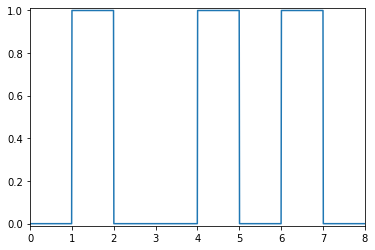

In [4]:
x = np.linspace(start=FROM, stop=TO, num=N)
y = np.zeros(N)
for i in range(TO):
    if L[i]:
        y[PART*i:PART*(i+1)] = 1

plt.plot(x, y)
plt.axis([0, TO, -0.01, 1.01])
save('JB.png')
plt.show()

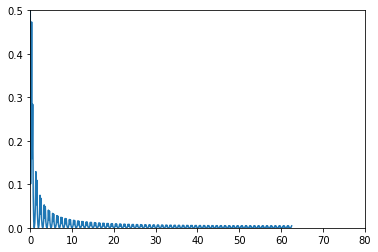

In [5]:
xf = np.linspace(start=0.0, stop=1.0/(2.0*T), num=N//2)
yf = np.fft.fft(y)

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.axis([0, 80, 0, 0.5])
save('JC.png')
plt.show()

In [6]:
def calcJ(harmonic: int):
    harmonic += 1
    tmp = np.copy(yf)
    tmp[harmonic:N] = 0
    return (np.real(np.fft.ifft(tmp))-(17/90))*2

def animateJ():
    if not os.path.exists('J'):
        os.mkdir('J')

    for i in range(N//2):
        yy = calcJ(i)
        plt.plot(x, yy)
        plt.axis([0, TO, -0.25, 1.25])
        save('J/' + str(i).rjust(3, '0') + '.png')
        plt.close()

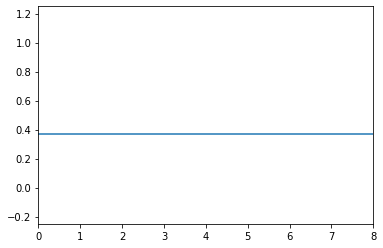

In [7]:
if EXPORT:
    animateJ()
else:
    @interact(harmonic=widgets.IntSlider(min=0, max=N//2, value=0))
    def interactiveJ(harmonic: int):
        yy = calcJ(harmonic)

        plt.plot(x, yy)
        plt.axis([0, TO, -0.25, 1.25])
        plt.show()